<a href="https://colab.research.google.com/github/MarioROT/CV-MAI/blob/main/Session%202/image_operators_and_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

### **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [18]:
%%shell
git clone https://github.com/MarioROT/CV-MAI
mv CV-MAI/scripts/custom_plots.py /content/
mv "CV-MAI/Session 2/images/" /content/
mv "CV-MAI/Session 2/notebook_images/" /content/

fatal: destination path 'CV-MAI' already exists and is not an empty directory.
mv: cannot stat 'CV-MAI/scripts/custom_plots.py': No such file or directory
mv: cannot stat 'CV-MAI/Session 2/images/': No such file or directory


In [5]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology, color, transform
import custom_plots as cp


# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


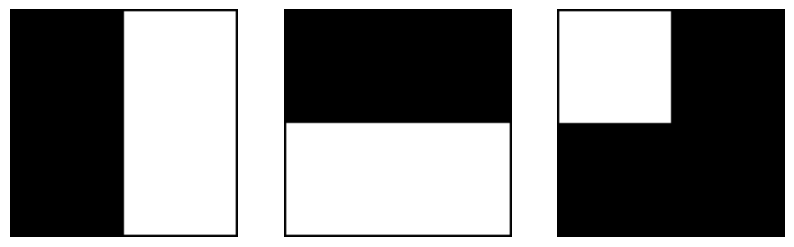

In [19]:
# solution

# First zeros (black) arrays are created, then specific colums
# are modified from 0 to 255 to have the desired white parts.

# Right half white
img1 = np.zeros([100,100])
img1[1:99:1,50:99] = 255

# Lower half white
img2 = np.zeros([100,100])
img2[50:99,1:99:1] = 255

# Upper left corner white
img3 = np.zeros([100,100])
img3[1:50,1:50] = 255

# Using custom code based on matlplotlib to plot the 3 images
cp.custom_grids([img1,img2, img3],1,3, axis='off', cmap='gray', use_grid_spec=False).show()

*   Use the above three images to create the following image

![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*

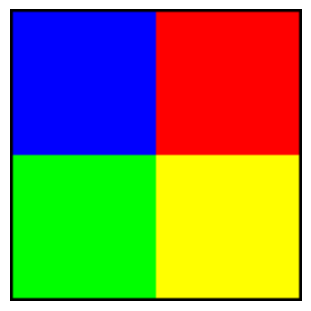

In [20]:
# solution
# All previous created images are combined in a single array
# we move the channels dim to the end for matplotlib to show the image
# (3,100,100) --> (100,100,3)
colors_img = np.moveaxis([img1, img2, img3], 0,-1).astype(np.uint8)
cp.custom_grids([colors_img], figsize=(3,3), axis='off').show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)

*   Extract individual channels and plot them using matplotlib subplot.



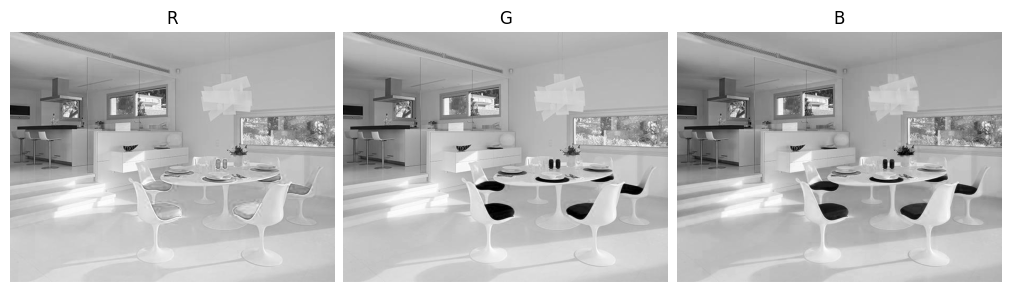

In [40]:
# solution
room_img = io.imread('notebook_images/sillas.jpg')
red, green, blue = room_img[:,:,0], room_img[:,:,1], room_img[:,:,2]
cp.custom_grids([red, green, blue], 1, 3, ['R', 'G', 'B'], axis='off', cmap='gray').show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

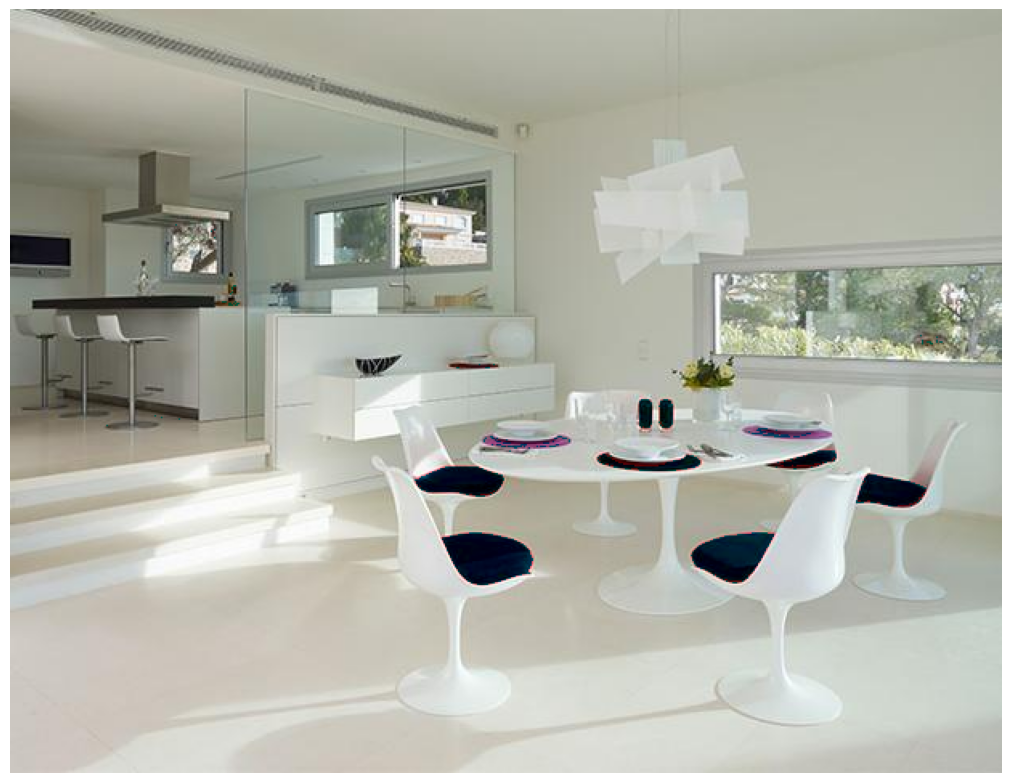

In [41]:
# solution
# Segmenting a red sample from the image and computing min value for red
# and max value for green and blue to get some tresholds of what values compose
# red things in the image. We add an adjustment to the values obtained in order
# to have a larger margin of reds.
red_sq = room_img[330:348, 439:465]
rmin = red_sq[:,:,0].min() - 35
gmax = red_sq[:,:,1].max() + 35
bmax = red_sq[:,:,2].max() + 35

# Applying tresholds to a copy of the image to mute red and highlight blue on originally red zones.
room_img[:,:,0] = np.where((red>rmin) & (green < gmax) & (blue < bmax), 0, red)
room_img[:,:,1] = np.where((red>rmin) & (green < gmax) & (blue < bmax), 0, green)
room_img[:,:,2] = np.where((red>rmin) & (green < gmax) & (blue < bmax), 255, blue)

cp.custom_grids([room_img], 1, 1, axis='off').show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)


In [46]:
def prepare_img(img, channels, dims):
  if img.shape[-3] > channels:
    img = img[:,:,:3]
  if img.shape[:2] != dims:
    img = transform.resize(img, dims, preserve_range=True)
  return img.astype(int)

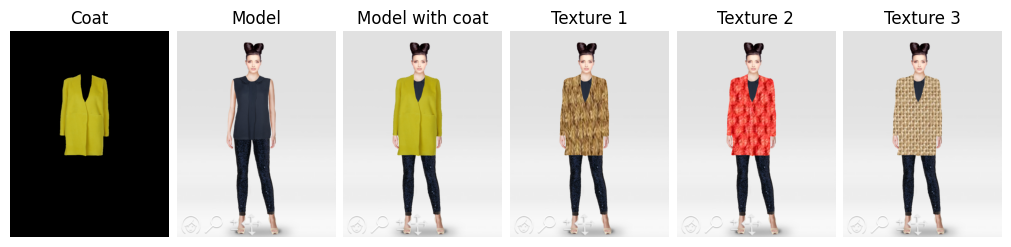

In [48]:
# solution

# Reading all images and preprocessing them to have the same number of channels and size
folder = '/content/images/'
model = io.imread(folder + 'model.png')
model = prepare_img(model, 3, model.shape[:2])
coat = prepare_img(io.imread(folder + 'coat.png'), 3, model.shape[:2])
textures = ['texture.png', 'texture2.png', 'texture3.jpg']

model_coat = np.where(coat != 0, coat, model)
model_t1 = np.where(coat != 0, prepare_img(io.imread(folder + textures[0]), 3, model.shape[:2]), model)
model_t2 = np.where(coat != 0, prepare_img(io.imread(folder + textures[1]), 3, model.shape[:2]), model)
model_t3 = np.where(coat != 0, prepare_img(io.imread(folder + textures[2]), 3, model.shape[:2]), model)

cp.custom_grids([coat, model, model_coat, model_t1, model_t2, model_t3], 1, 6, ['Coat', 'Model', 'Model with coat', 'Texture 1', 'Texture 2', 'Texture 3'], axis='off').show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




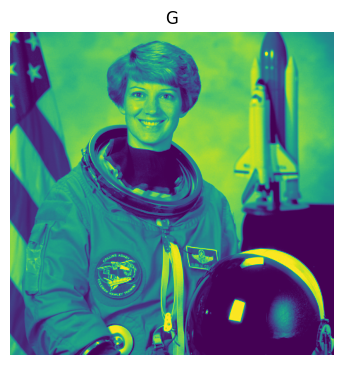

In [63]:
# solution

#Reading the astronaut image and convert to grayscale
from skimage import data,exposure
from skimage.color import rgb2gray

astr_gray= rgb2gray(data.astronaut())

#Checking the RGB to Gray modification
cp.custom_grids([astr_gray],3,1, 'Gray Astronaut', axis='off').show()

#Histogram of the image
hist= exposure.histogram(astr_gray)
plt.show()




*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

In [64]:
# solution

hist_8bin= exposure.histogram(astr_gray,8)



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


In [ ]:
#solution



### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



In [ ]:
# solution




*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function).
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [ ]:
# solution



# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




In [ ]:
# solution



*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

In [ ]:
# solution



*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

...


---

## **End of P2: Image operators and filters**

Deadline for P2 submission in CampusVirtual is: **Thursday, the 6th of October, 2022**
